<img src="Logo_ESPRIT.jpg" width="300" align="right"></a>


<h1 align="center"><font size="5">Projet Machine Learning</font></h1>

Ce Porjet doit être rédigé et sera évalué. Le code python produit doit être inclus. Pour la mise en page et le format, il est préférable de le rendre sous la forme d’un notebook Jupyter, ou alors d’un document pdf. Les noms doivent apparaître dans le document. Il doit être envoyé le ../../ 2021 au plus tard à l’adresse suivante.
mohamedhedi.riahi@esprit.tn 

# Objectif du projet
L'objectif de ce projet est de:

- Comprendre les données en faisant des graphiques, utilisant pandas,...
- Faire la Préparation des données nettoyage, encodage, normalisation et etc ... 
- Faire l'étape de feautres selection.
- Tester 8 algorithmes de classification (K_nearst neighbors, Arbre de décision, Régression Logistique, Naive Bayes ,SVM, Random Forest, Xgboost,neural network) pour la résolution d'un problème de classification binaire(deux classes)
- Régler le maximum de paramètres pour chaque algorithme
- Tracer la matrice de confusion et afficher __classification_report__ de chaque algorithme
- Choisir le meilleur algorithme en utilisant __classification_report__
- Tracer les courbes ROC et calculer Auc pour les algorithmes.

# Base de données __Telco_Customer_Churn__

Pour ce projet on considère un jeu de données en télécommunications. Chaque exemple correspond à un client abonné ou non à un service de télécommunications. Les variables explicatives portent sur des caractéristiques observées de client. La variable  __churn__ à prédire indique si le client est abonné ou non.

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# pip install imbalanced-learn
# pip install xgboost
# pip install flask

# Data understanding

In [114]:
# Chargement des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle

### Importer l'ensemble de données avec read_csv:  Telco_Customer_Chrun.csv

In [3]:
telco_customer_churn=pd.read_csv('Telco_Customer_Churn.csv')

In [4]:
telco_customer_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


(1) Demographic Information
- gender: Whether the client is a female or a male (Female, Male).
- SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).
- Partner: Whether the client has a partner or not (Yes, No).
- Dependents: Whether the client has dependents or not (Yes, No).

(2) Customer Account Information
- tenure: Number of months the customer has stayed with the company (Multiple different numeric values).
- Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).
- PaperlessBilling: Whether the client has paperless billing or not (Yes, No).
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).
- MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).
- TotalCharges: The total amount charged to the customer (Multiple different numeric values).

(3) Services Information
- PhoneService: Whether the client has a phone service or not (Yes, No).
- MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).
- InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)
- OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).
- OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).
- DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).
- TechSupport: Whether the client has tech support or not (No internet service, No, Yes).
- StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).
- StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes).

In [5]:
print(telco_customer_churn.shape)
print(telco_customer_churn.columns)
print("nombre de features :",len(telco_customer_churn.columns)-1)
print(telco_customer_churn.info())

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
nombre de features : 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   In

In [6]:
telco_customer_churn.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [7]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [8]:
for i in telco_customer_churn.columns:
    print(bcolors.FAIL+i+": "+str(len(telco_customer_churn[i].unique()))+" "+bcolors.ENDC+str(telco_customer_churn[i].unique()))

customerID: 7043 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: 2 ['Female' 'Male']
SeniorCitizen: 2 [0 1]
Partner: 2 ['Yes' 'No']
Dependents: 2 ['No' 'Yes']
tenure: 73 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: 2 ['No' 'Yes']
MultipleLines: 3 ['No phone service' 'No' 'Yes']
InternetService: 3 ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 ['No' 'Yes' 'No internet service']
OnlineBackup: 3 ['Yes' 'No' 'No internet service']
DeviceProtection: 3 ['No' 'Yes' 'No internet service']
TechSupport: 3 ['No' 'Yes' 'No internet service']
StreamingTV: 3 ['No' 'Yes' 'No internet service']
StreamingMovies: 3 ['No' 'Yes' 'No internet service']
Contract: 3 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 2 ['Yes' 'No']
PaymentMethod: 4 ['Electronic check' '

In [9]:
#copie de notre dataframe
telco_customer_churn1=telco_customer_churn.copy()
telco_customer_churn1=telco_customer_churn1.drop('customerID',axis=1)
telco_customer_churn1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data visualisation

In [10]:
def datavis(parametre):
    print(telco_customer_churn1[parametre].value_counts())
    sns.countplot(telco_customer_churn1[parametre],data=telco_customer_churn1)
    plt.rcParams['figure.figsize']=(12,12)
    plt.tick_params(labelsize=15)
    plt.show()

Male      3555
Female    3488
Name: gender, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


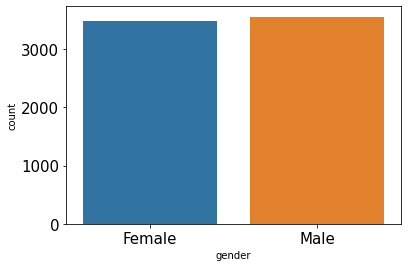

In [11]:
#gender
datavis('gender')

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


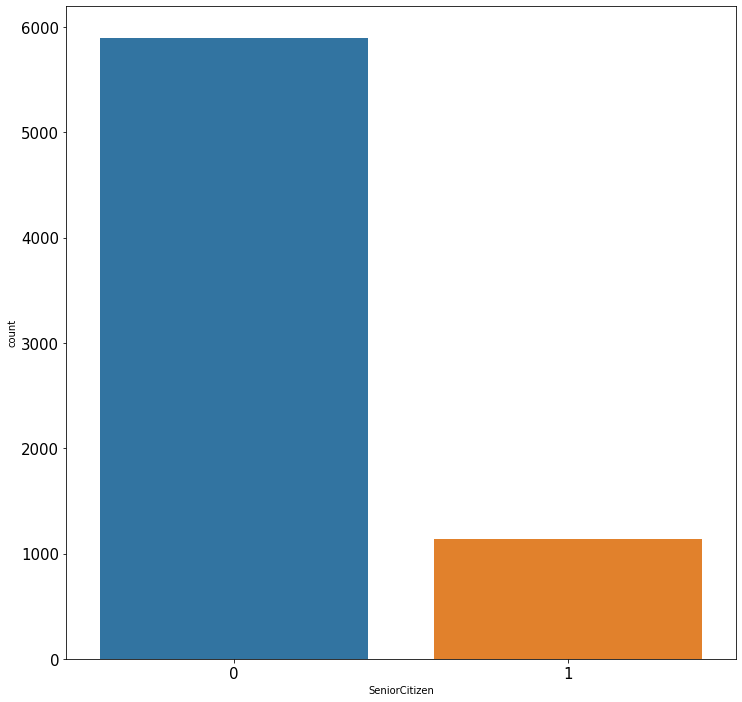

In [12]:
#SeniorCitizen
datavis('SeniorCitizen')

No     3641
Yes    3402
Name: Partner, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


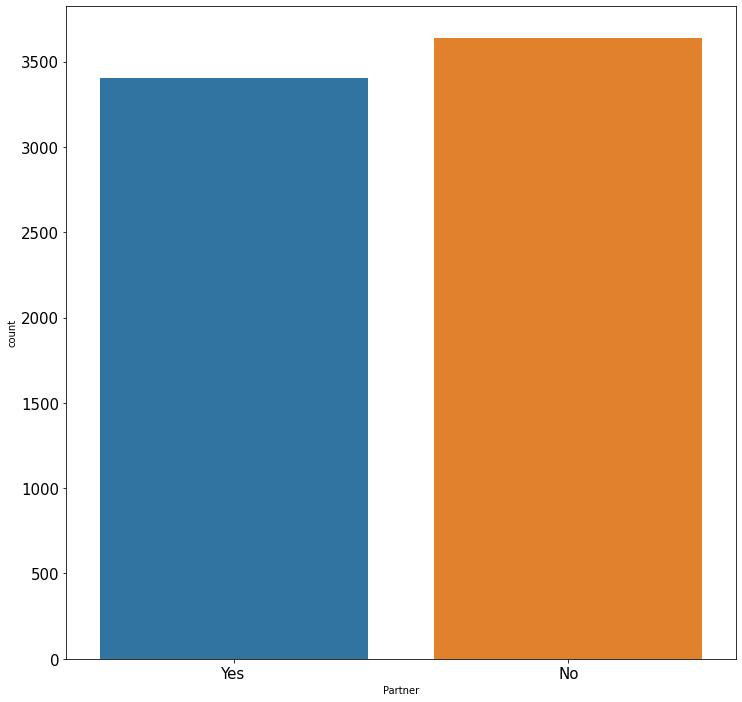

In [13]:
#Partner
datavis('Partner')

No     4933
Yes    2110
Name: Dependents, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


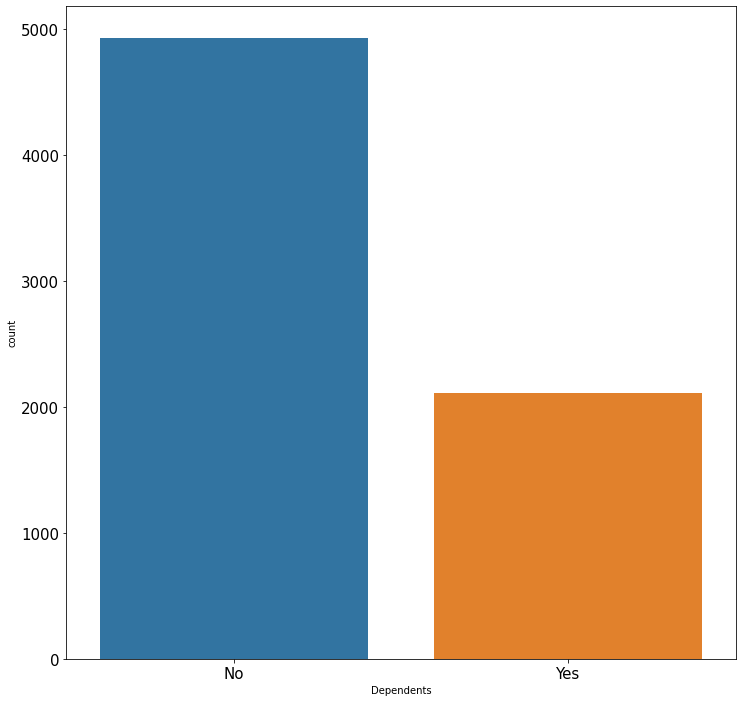

In [14]:
#Partner
datavis('Dependents')

Yes    6361
No      682
Name: PhoneService, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


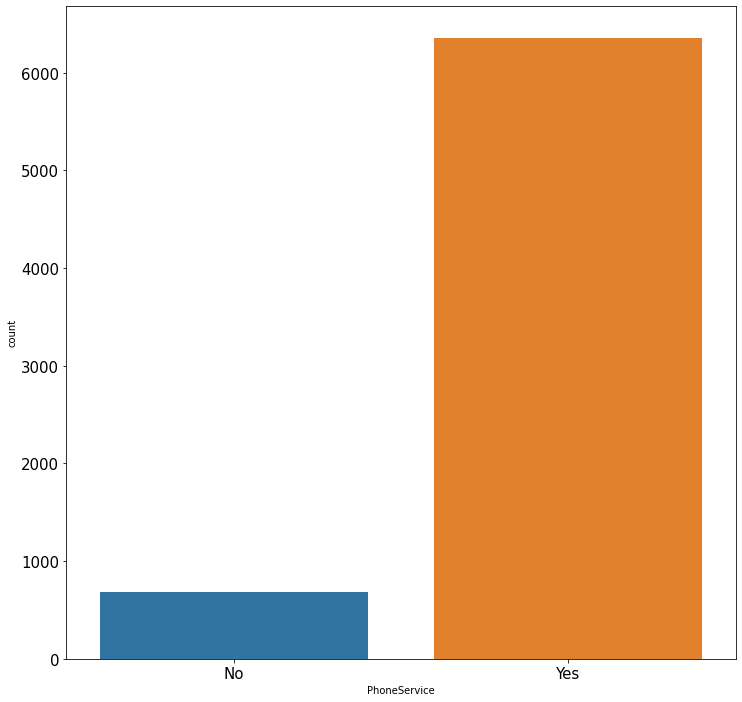

In [15]:
#PhoneService
datavis('PhoneService')

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


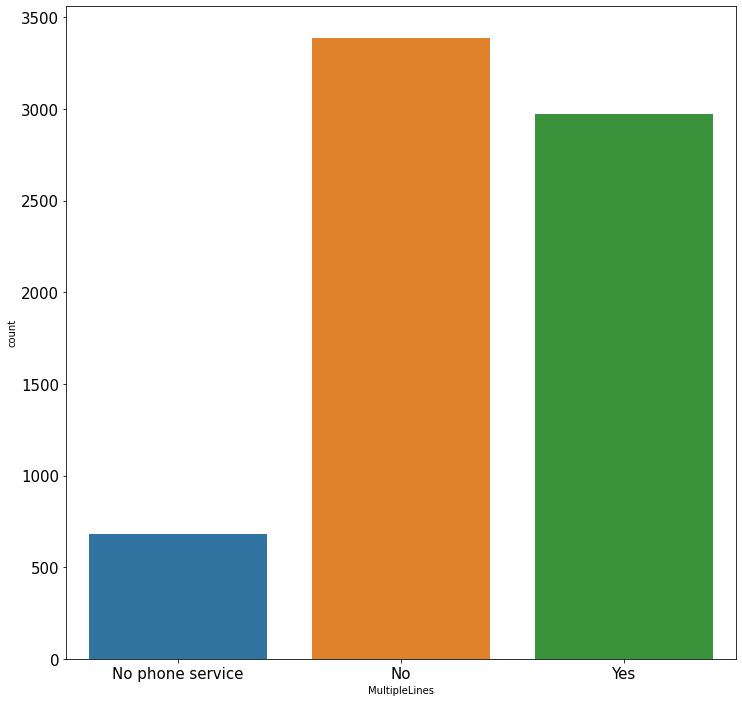

In [16]:
#MultipleLines
datavis('MultipleLines')

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


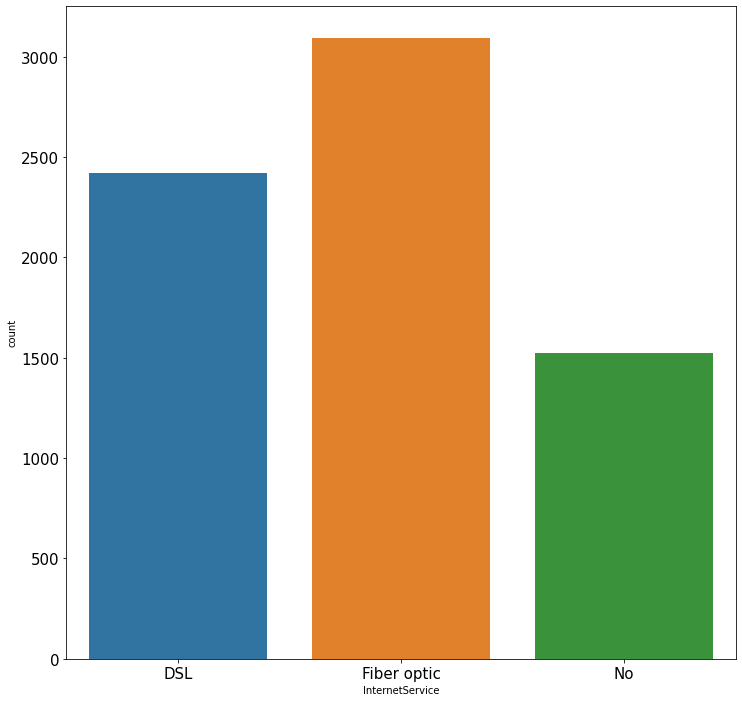

In [17]:
#InternetService
datavis('InternetService')

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


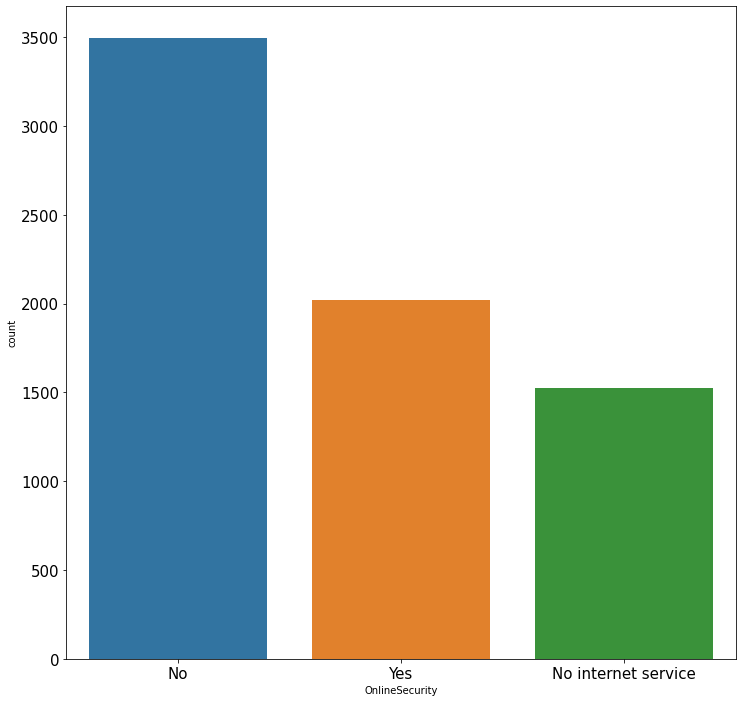

In [18]:
#OnlineSecurity
datavis('OnlineSecurity')

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


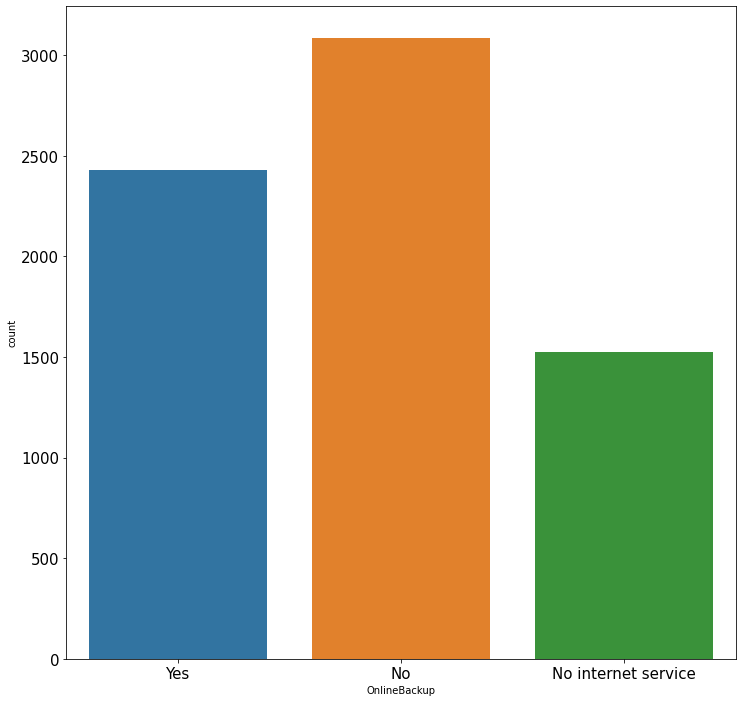

In [19]:
#OnlineBackup
datavis('OnlineBackup')

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


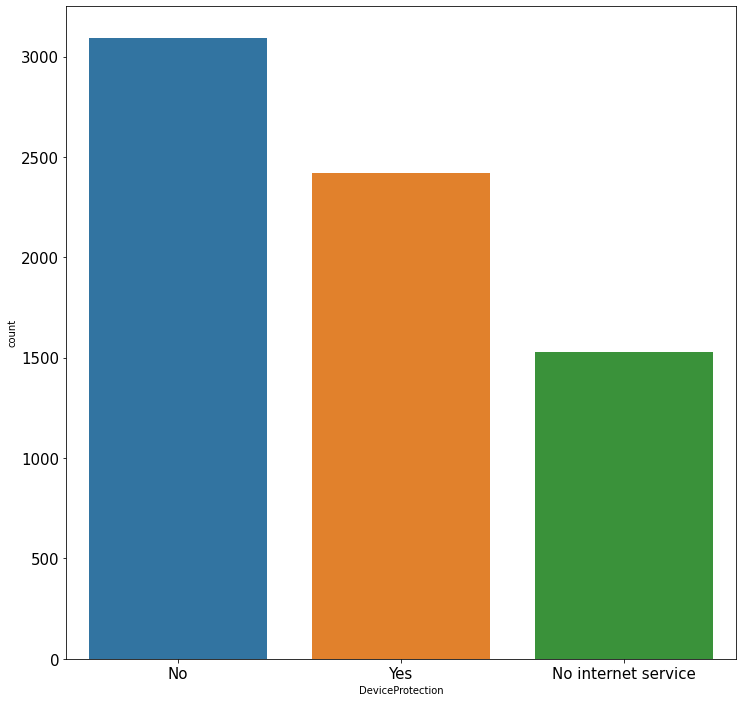

In [20]:
#DeviceProtection
datavis('DeviceProtection')

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


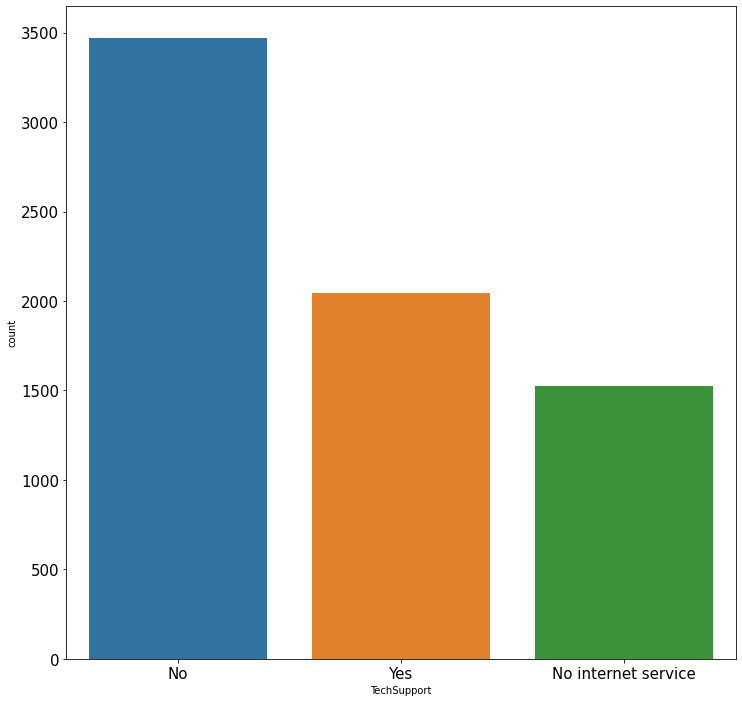

In [21]:
#TechSupport
datavis('TechSupport')

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


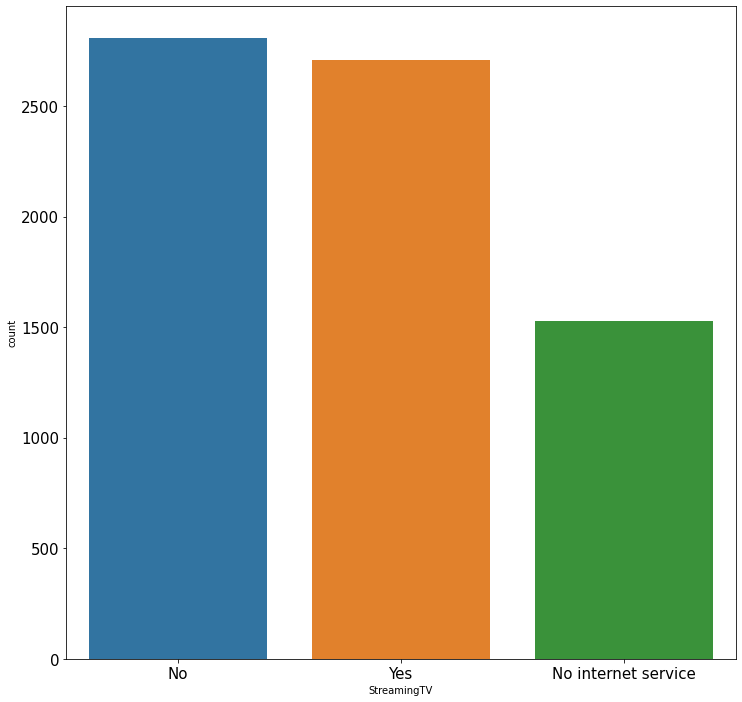

In [22]:
#StreamingTV
datavis('StreamingTV')

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


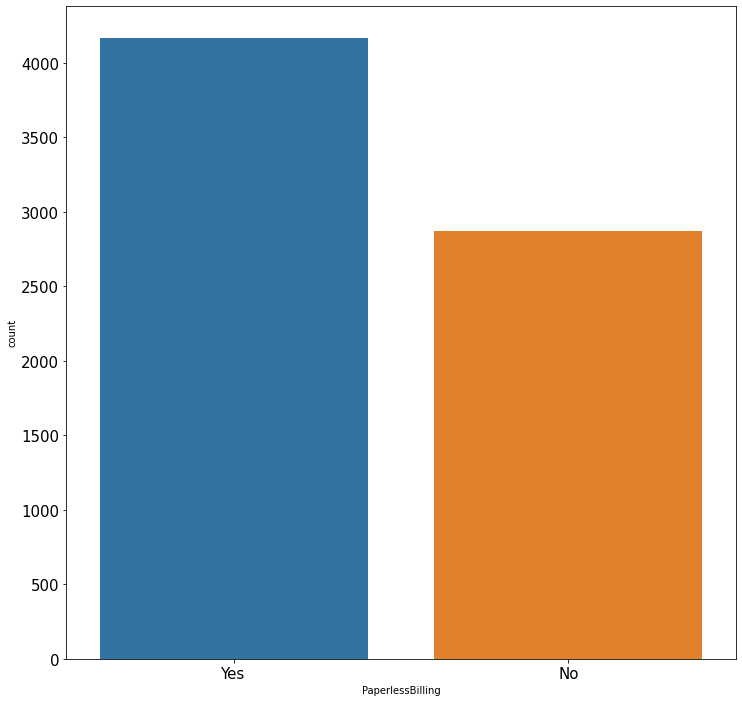

In [23]:
#PaperlessBilling
datavis('PaperlessBilling')

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


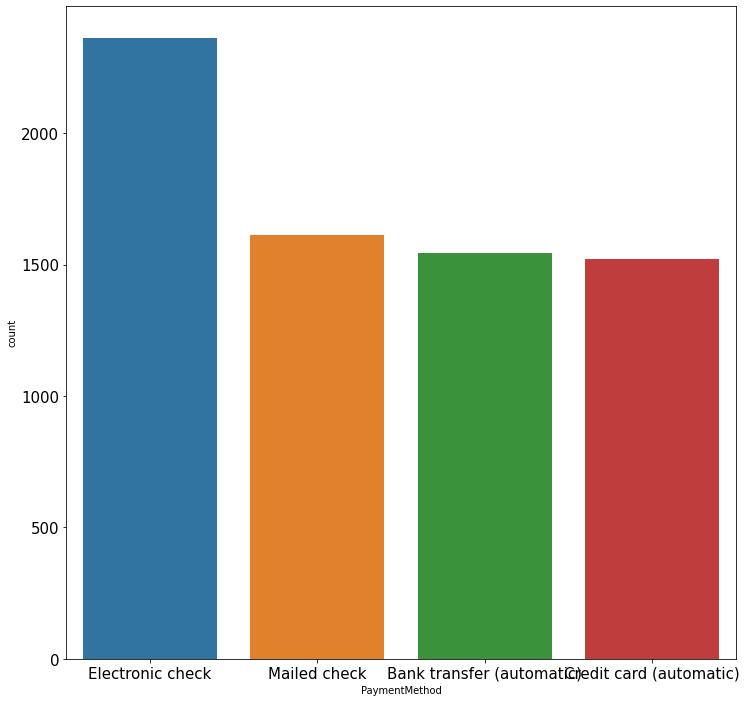

In [24]:
#PaymentMethod
datavis('PaymentMethod')

No     5174
Yes    1869
Name: Churn, dtype: int64


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


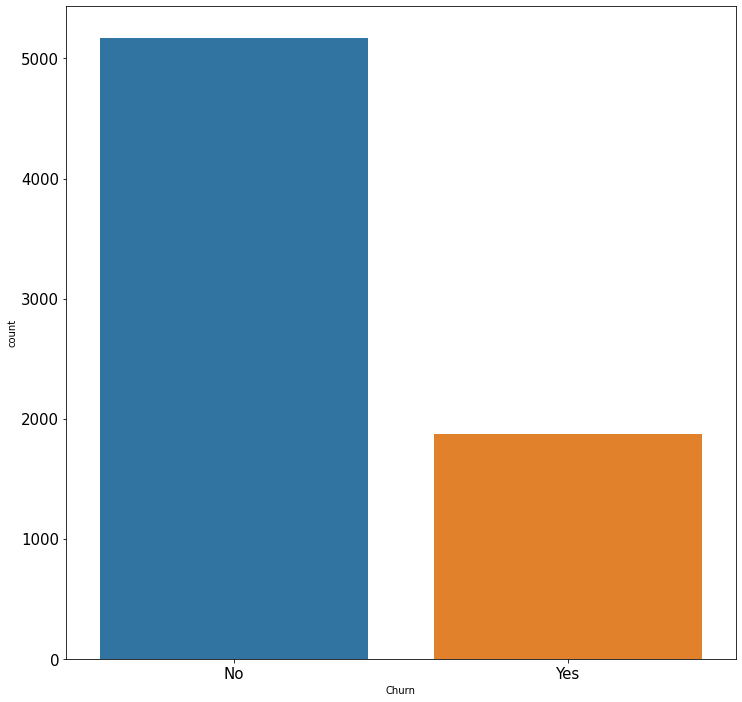

In [25]:
#Churn
datavis('Churn')

### TotalCharges cleaning

In [27]:
telco_customer_churn1[telco_customer_churn1['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [28]:
telco_customer_churn1[telco_customer_churn1['tenure']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [29]:
TotalCharges=[]
for i in range(len(telco_customer_churn1)):
    if telco_customer_churn1.loc[i].TotalCharges==' ':
        TotalCharges.append(0)
    else:
        TotalCharges.append(telco_customer_churn1.loc[i]['TotalCharges'])
telco_customer_churn1['TotalCharges'] = TotalCharges

In [30]:
# telco_customer_churn1.loc[:490]
telco_customer_churn1.TotalCharges=pd.to_numeric(telco_customer_churn1.TotalCharges)
telco_customer_churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## split dataset

In [31]:
ChurnNo=telco_customer_churn1.Churn[telco_customer_churn1.Churn=='No'].count()
print(ChurnNo)
ChurnYes=telco_customer_churn1.Churn[telco_customer_churn1.Churn=='Yes'].count()
print(ChurnYes)
print('rapport yes/No',round(ChurnYes/ChurnNo*100),'%')

5174
1869
rapport yes/No 36 %


In [32]:
X=telco_customer_churn1.drop('Churn',axis=1)
y=telco_customer_churn1.Churn
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [33]:
#stratified
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [34]:
y_train_Yes=y_train[y_train=='Yes'].count()
print('y_train_Yes ',y_train_Yes)
y_train_No=y_train[y_train=='No'].count()
print('y_train_No ',y_train_No)

y_train_Yes  1495
y_train_No  4139


In [35]:
#y_train
print('y_train :',y_train.shape)
print('rapport yes/No :',round(y_train_Yes/y_train_No*100),'%')
#y_test
print('y_test :',y_test.shape)
print('rapport yes/No :',round(y_test[y_test=='Yes'].count()/y_test[y_test=='No'].count()*100),'%')

y_train : (5634,)
rapport yes/No : 36 %
y_test : (1409,)
rapport yes/No : 36 %


## Encodage and Feature Selection

In [36]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3738,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65
3151,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55
4860,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35
3867,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70
3810,Male,0,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.25,7707.70
6227,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),46.05,80.35
4673,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,102.80,2660.20
2710,Female,0,Yes,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.40,482.80


In [37]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
437,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.20
2280,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55
2235,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.20
4460,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75
3761,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,Female,0,Yes,Yes,49,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,87.20,4345.00
4439,Male,0,Yes,Yes,28,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.30,487.95
3857,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.65,93.55
4758,Female,0,No,No,56,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,1051.90


In [38]:
y_train

3738     No
3151     No
4860     No
3867     No
3810     No
       ... 
6303     No
6227    Yes
4673    Yes
2710     No
5639     No
Name: Churn, Length: 5634, dtype: object

In [39]:
y_test

437     No
2280    No
2235    No
4460    No
3761    No
        ..
5143    No
4439    No
3857    No
4758    No
5613    No
Name: Churn, Length: 1409, dtype: object

In [40]:
encodeur=LabelEncoder()

X_train['gender']=encodeur.fit_transform(X_train['gender'])
X_test['gender']=encodeur.transform(X_test['gender'])

X_train['Partner']=encodeur.fit_transform(X_train['Partner'])
X_test['Partner']=encodeur.transform(X_test['Partner'])

X_train['Dependents']=encodeur.fit_transform(X_train['Dependents'])
X_test['Dependents']=encodeur.transform(X_test['Dependents'])

X_train['PhoneService']=encodeur.fit_transform(X_train['PhoneService'])
X_test['PhoneService']=encodeur.transform(X_test['PhoneService'])

X_train['MultipleLines']=encodeur.fit_transform(X_train['MultipleLines'])
X_test['MultipleLines']=encodeur.transform(X_test['MultipleLines'])

X_train['InternetService']=encodeur.fit_transform(X_train['InternetService'])
X_test['InternetService']=encodeur.transform(X_test['InternetService'])

X_train['OnlineSecurity']=encodeur.fit_transform(X_train['OnlineSecurity'])
X_test['OnlineSecurity']=encodeur.transform(X_test['OnlineSecurity'])

X_train['OnlineBackup']=encodeur.fit_transform(X_train['OnlineBackup'])
X_test['OnlineBackup']=encodeur.transform(X_test['OnlineBackup'])

X_train['DeviceProtection']=encodeur.fit_transform(X_train['DeviceProtection'])
X_test['DeviceProtection']=encodeur.transform(X_test['DeviceProtection'])

X_train['TechSupport']=encodeur.fit_transform(X_train['TechSupport'])
X_test['TechSupport']=encodeur.transform(X_test['TechSupport'])

X_train['StreamingTV']=encodeur.fit_transform(X_train['StreamingTV'])
X_test['StreamingTV']=encodeur.transform(X_test['StreamingTV'])

X_train['StreamingMovies']=encodeur.fit_transform(X_train['StreamingMovies'])
X_test['StreamingMovies']=encodeur.transform(X_test['StreamingMovies'])

X_train['Contract']=encodeur.fit_transform(X_train['Contract'])
X_test['Contract']=encodeur.transform(X_test['Contract'])

X_train['PaperlessBilling']=encodeur.fit_transform(X_train['PaperlessBilling'])
X_test['PaperlessBilling']=encodeur.transform(X_test['PaperlessBilling'])

X_train['PaymentMethod']=encodeur.fit_transform(X_train['PaymentMethod'])
X_test['PaymentMethod']=encodeur.transform(X_test['PaymentMethod'])

y_train=encodeur.fit_transform(y_train)
y_test=encodeur.transform(y_test)

    

In [41]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3738,1,0,0,0,35,0,1,0,0,0,2,0,2,2,0,0,2,49.20,1701.65
3151,1,0,1,1,15,1,0,1,2,0,0,0,0,0,0,0,3,75.10,1151.55
4860,1,0,1,1,13,0,1,0,2,2,0,2,0,0,2,0,3,40.55,590.35
3867,0,0,1,0,26,1,0,0,0,2,2,0,2,2,2,1,1,73.50,1905.70
3810,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,2,44.55,44.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0,0,1,0,71,1,2,1,0,2,2,2,2,2,2,0,2,109.25,7707.70
6227,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,46.05,80.35
4673,0,1,0,0,25,1,2,1,2,2,0,0,2,2,0,1,3,102.80,2660.20
2710,0,0,1,0,24,1,0,2,1,1,1,1,1,1,1,0,1,20.40,482.80


In [42]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
437,1,0,1,1,72,1,2,1,2,2,2,2,2,2,2,1,1,114.05,8468.20
2280,0,1,0,0,8,1,2,1,0,0,0,2,2,2,0,1,1,100.15,908.55
2235,0,0,1,1,41,1,2,0,2,2,2,0,2,0,1,1,1,78.35,3211.20
4460,1,0,1,0,18,1,0,1,0,0,2,2,0,0,0,0,2,78.20,1468.75
3761,0,0,1,0,72,1,2,0,2,2,2,0,2,2,2,1,1,82.65,5919.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,0,0,1,1,49,1,0,0,2,2,2,2,2,2,1,1,3,87.20,4345.00
4439,1,0,1,1,28,1,0,2,1,1,1,1,1,1,2,1,1,20.30,487.95
3857,1,0,0,0,5,1,0,2,1,1,1,1,1,1,0,0,0,20.65,93.55
4758,0,0,0,0,56,1,0,2,1,1,1,1,1,1,2,0,0,19.70,1051.90


In [43]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
for i in X_train.columns:
    print(bcolors.FAIL+i+": "+str(len(X_train[i].unique()))+" "+bcolors.ENDC+str(X_train[i].unique()))

gender: 2 [1 0]
SeniorCitizen: 2 [0 1]
Partner: 2 [0 1]
Dependents: 2 [0 1]
tenure: 73 [35 15 13 26  1 66 40 65 60  5  2 30 36 55 31 28 16  6 27 58 72 12 71  3
 25 52 46  9 19 45 38 10 18 37 11 64 48 20 69 63 39  4 53 51 61  8 24 14
 68 23  7 32 56 43 29 67 50 59 21 47 41 34 57 33 44 70 49 22 42 62 54 17
  0]
PhoneService: 2 [0 1]
MultipleLines: 3 [1 0 2]
InternetService: 3 [0 1 2]
OnlineSecurity: 3 [0 2 1]
OnlineBackup: 3 [0 2 1]
DeviceProtection: 3 [2 0 1]
TechSupport: 3 [0 2 1]
StreamingTV: 3 [2 0 1]
StreamingMovies: 3 [2 0 1]
Contract: 3 [0 2 1]
PaperlessBilling: 2 [0 1]
PaymentMethod: 4 [2 3 1 0]
MonthlyCharges: 1489 [ 49.2   75.1   40.55 ...  56.8   46.05 102.8 ]
TotalCharges: 5276 [1701.65 1151.55  590.35 ...   80.35 2660.2   109.3 ]


In [46]:
X_train.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,0.007095,-0.005150,0.008329,-0.003024,0.003666,-0.012235,0.003639,-0.022955,-0.013961,0.004630,-0.018022,-0.013591,-0.018821,-0.008318,-0.025967,0.005764,-0.022118,-0.008960
SeniorCitizen,0.007095,1.000000,0.015729,-0.213300,0.016980,0.008483,0.143994,-0.033199,-0.113953,-0.009927,-0.019862,-0.152885,0.040783,0.043526,-0.142953,0.157326,-0.034873,0.220376,0.102318
Partner,-0.005150,0.015729,1.000000,0.446276,0.373689,0.023485,0.151746,0.007331,0.152095,0.148506,0.167660,0.128177,0.140947,0.132637,0.294694,-0.014067,-0.160857,0.101317,0.315081
Dependents,0.008329,-0.213300,0.446276,1.000000,0.154892,-0.004428,-0.011911,0.052915,0.144639,0.085048,0.074525,0.132809,0.046677,0.018039,0.240206,-0.116574,-0.045481,-0.114901,0.059160
tenure,-0.003024,0.016980,0.373689,0.154892,1.000000,0.003653,0.349918,-0.034786,0.322140,0.376786,0.373820,0.321684,0.286577,0.300744,0.670011,0.010525,-0.373146,0.256700,0.829698
PhoneService,0.003666,0.008483,0.023485,-0.004428,0.003653,1.000000,-0.018338,0.392659,-0.018954,0.022191,0.004724,-0.022236,0.056190,0.035936,-0.001380,0.005433,-0.006450,0.248911,0.112040
MultipleLines,-0.012235,0.143994,0.151746,-0.011911,0.349918,-0.018338,1.000000,-0.103685,0.011646,0.130552,0.130892,0.020454,0.181295,0.188681,0.115106,0.158270,-0.183152,0.436575,0.458369
InternetService,0.003639,-0.033199,0.007331,0.052915,-0.034786,0.392659,-0.103685,1.000000,-0.032926,0.034818,0.051899,-0.029863,0.103602,0.090085,0.093072,-0.139438,0.082943,-0.319716,-0.174119
OnlineSecurity,-0.022955,-0.113953,0.152095,0.144639,0.322140,-0.018954,0.011646,-0.032926,1.000000,0.171442,0.162167,0.283377,0.042676,0.062637,0.378294,-0.161843,-0.089526,-0.055614,0.248768
OnlineBackup,-0.013961,-0.009927,0.148506,0.085048,0.376786,0.022191,0.130552,0.034818,0.171442,1.000000,0.186642,0.197193,0.141195,0.133803,0.278490,-0.010509,-0.132885,0.126153,0.380747


In [47]:
# on remarque que TotalCharges est en relation directe avec MonthlyCharges and Tenure
X_train=X_train.drop('tenure',axis=1)
X_train=X_train.drop('MonthlyCharges',axis=1)
X_train=X_train.drop('Contract',axis=1)

In [48]:
X_test=X_test.drop('tenure',axis=1)
X_test=X_test.drop('MonthlyCharges',axis=1)
X_test=X_test.drop('Contract',axis=1)

In [49]:
X_train

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,TotalCharges
3738,1,0,0,0,0,1,0,0,0,2,0,2,2,0,2,1701.65
3151,1,0,1,1,1,0,1,2,0,0,0,0,0,0,3,1151.55
4860,1,0,1,1,0,1,0,2,2,0,2,0,0,0,3,590.35
3867,0,0,1,0,1,0,0,0,2,2,0,2,2,1,1,1905.70
3810,1,0,1,1,1,0,0,0,0,0,0,0,0,0,2,44.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0,0,1,0,1,2,1,0,2,2,2,2,2,0,2,7707.70
6227,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,80.35
4673,0,1,0,0,1,2,1,2,2,0,0,2,2,1,3,2660.20
2710,0,0,1,0,1,0,2,1,1,1,1,1,1,0,1,482.80


In [50]:
X_test

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,TotalCharges
437,1,0,1,1,1,2,1,2,2,2,2,2,2,1,1,8468.20
2280,0,1,0,0,1,2,1,0,0,0,2,2,2,1,1,908.55
2235,0,0,1,1,1,2,0,2,2,2,0,2,0,1,1,3211.20
4460,1,0,1,0,1,0,1,0,0,2,2,0,0,0,2,1468.75
3761,0,0,1,0,1,2,0,2,2,2,0,2,2,1,1,5919.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,0,0,1,1,1,0,0,2,2,2,2,2,2,1,3,4345.00
4439,1,0,1,1,1,0,2,1,1,1,1,1,1,1,1,487.95
3857,1,0,0,0,1,0,2,1,1,1,1,1,1,0,0,93.55
4758,0,0,0,0,1,0,2,1,1,1,1,1,1,0,0,1051.90


In [51]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [52]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

[0.0, 398.55, 1394.55, 3786.6, 8684.8]

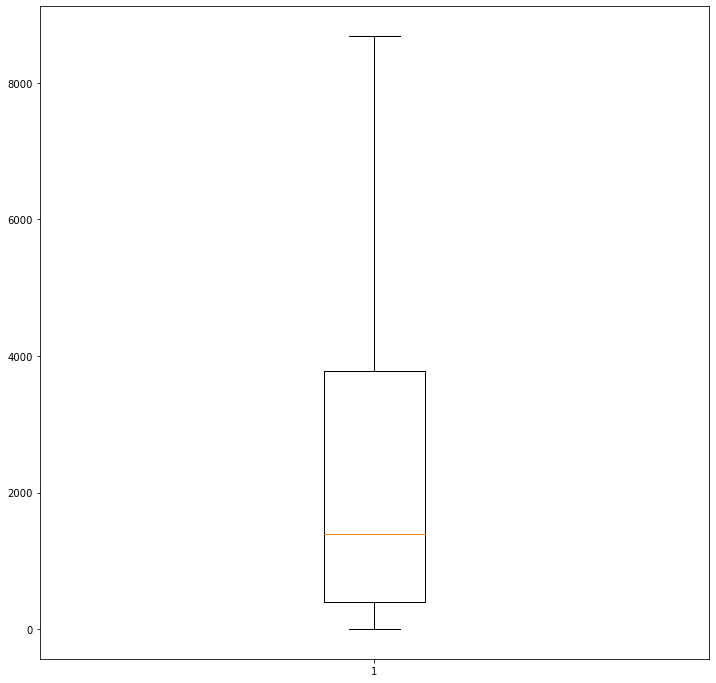

In [53]:
#transform TotalCharges to quantitative variable
bp=plt.boxplot(telco_customer_churn1.TotalCharges)
bp.keys()
min_TotalCharges=bp['whiskers'][0].get_ydata()[1]
Q1_TotalCharges=bp['whiskers'][0].get_ydata()[0]
median_TotalCharges=bp['medians'][0].get_ydata()[0]
Q3_TotalCharges=bp['whiskers'][1].get_ydata()[0]
max_TotalCharges=bp['whiskers'][1].get_ydata()[1]
Value_boxplot_TotalCharges=[min_TotalCharges,Q1_TotalCharges,median_TotalCharges,Q3_TotalCharges,max_TotalCharges]
Value_boxplot_TotalCharges

In [54]:
def to_quantitative_variable(data,Interval):
    listequantitative=[]
    for i in data:
        if i<=Interval[1]:
            listequantitative.append(0)
        elif i<=Interval[2] and i>=Interval[1]:
            listequantitative.append(1)
        elif i<=Interval[3] and i>=Interval[2]:
            listequantitative.append(2)
        elif i<=Interval[4] and i>=Interval[3]:
            listequantitative.append(3)   
    return listequantitative

In [55]:
listequantitative_train=to_quantitative_variable(X_train.TotalCharges,Value_boxplot_TotalCharges)
listequantitative_test=to_quantitative_variable(X_test.TotalCharges,Value_boxplot_TotalCharges)
X_train.TotalCharges=listequantitative_train
X_test.TotalCharges=listequantitative_test
print(X_train)
print(X_test)


      gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
3738       1              0        0           0             0              1   
3151       1              0        1           1             1              0   
4860       1              0        1           1             0              1   
3867       0              0        1           0             1              0   
3810       1              0        1           1             1              0   
...      ...            ...      ...         ...           ...            ...   
6303       0              0        1           0             1              2   
6227       1              0        0           0             1              0   
4673       0              1        0           0             1              2   
2710       0              0        1           0             1              0   
5639       1              0        0           0             1              0   

      InternetService  Onli

### Imbalanced target

<img src="imbalanced.jpeg"> 

### 10 Techniques to deal with Imbalanced Classes in Machine Learning :
#### - Resampling Technique : 
    - Random Under-Sampling
    - Random Over-Sampling
#### - Balance data with the imbalanced-learn python module :
    - Random under-sampling with imblearn
    - Random over-sampling with imblearn
    - Under-sampling: Tomek links
    - Synthetic Minority Oversampling Technique (SMOTE)
    - NearMiss
    - Change the performance metric
    - Penalize Algorithms (Cost-Sensitive Training)
    - Change the algorithm (Random Forests, Gradient Boosted Trees)
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

In [56]:
#smote
data_for_under_sampling=X_train
data_for_under_sampling['Churn']=y_train
data_for_under_sampling

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,TotalCharges,Churn
3738,1,0,0,0,0,1,0,0,0,2,0,2,2,0,2,2,0
3151,1,0,1,1,1,0,1,2,0,0,0,0,0,0,3,1,0
4860,1,0,1,1,0,1,0,2,2,0,2,0,0,0,3,1,0
3867,0,0,1,0,1,0,0,0,2,2,0,2,2,1,1,2,0
3810,1,0,1,1,1,0,0,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0,0,1,0,1,2,1,0,2,2,2,2,2,0,2,3,0
6227,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4673,0,1,0,0,1,2,1,2,2,0,0,2,2,1,3,2,1
2710,0,0,1,0,1,0,2,1,1,1,1,1,1,0,1,1,0


In [57]:
data_for_under_sampling_No=data_for_under_sampling[data_for_under_sampling['Churn']==0]
data_for_under_sampling_Yes=data_for_under_sampling[data_for_under_sampling['Churn']==1]
print(data_for_under_sampling_No.shape)
print(data_for_under_sampling_Yes.shape)

(4139, 17)
(1495, 17)


In [58]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train,y_train)

In [59]:
print(x_rus.shape)
print(y_rus.shape)

(2990, 17)
(2990,)


In [60]:
y_rus

array([0, 0, 0, ..., 1, 1, 1])

In [61]:
x_rus

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0
1,0,0,1,1,1,2,2,1,1,1,1,1,1,0,3,2,0
2,1,0,1,0,1,2,0,0,0,2,0,0,0,0,1,2,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,1,3,0,0
4,0,0,1,1,1,2,1,2,0,0,0,2,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,0,0,1,1,1,2,1,0,2,2,0,0,0,1,2,1,1
2986,0,0,0,0,0,1,0,2,0,2,2,2,2,0,3,1,1
2987,0,1,1,0,0,1,0,0,2,2,0,2,2,0,1,2,1
2988,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [62]:
x_rus_No=len(x_rus[x_rus['Churn']==0])
x_rus_Yes=len(x_rus[x_rus['Churn']==1])
print(x_rus_No)
print(x_rus_Yes)

1495
1495


In [63]:
y_rus_No=len(y_rus[y_rus==0])
y_rus_Yes=len(y_rus[y_rus==1])
print(y_rus_No)
print(y_rus_Yes)

1495
1495


In [64]:
X_train_rus=x_rus.drop('Churn',axis=1)
y_train_rus=y_rus
X_train_rus,y_train_rus

(      gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
 0          0              0        0           0             1              0   
 1          0              0        1           1             1              2   
 2          1              0        1           0             1              2   
 3          0              0        0           0             1              0   
 4          0              0        1           1             1              2   
 ...      ...            ...      ...         ...           ...            ...   
 2985       0              0        1           1             1              2   
 2986       0              0        0           0             0              1   
 2987       0              1        1           0             0              1   
 2988       1              0        0           0             1              0   
 2989       0              1        0           0             1              2   
 
       Interne

### TEST_SET Cleaning

In [65]:
X_test

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,TotalCharges
437,1,0,1,1,1,2,1,2,2,2,2,2,2,1,1,3
2280,0,1,0,0,1,2,1,0,0,0,2,2,2,1,1,1
2235,0,0,1,1,1,2,0,2,2,2,0,2,0,1,1,2
4460,1,0,1,0,1,0,1,0,0,2,2,0,0,0,2,2
3761,0,0,1,0,1,2,0,2,2,2,0,2,2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,0,0,1,1,1,0,0,2,2,2,2,2,2,1,3,3
4439,1,0,1,1,1,0,2,1,1,1,1,1,1,1,1,1
3857,1,0,0,0,1,0,2,1,1,1,1,1,1,0,0,0
4758,0,0,0,0,1,0,2,1,1,1,1,1,1,0,0,1


In [66]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

#  MODELING

# K Nearest Neighbor(KNN)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [68]:
k_range=list(range(1,26))
p=list(range(1,7))
weight=['uniform','distance']
parm_grid=dict(n_neighbors=k_range,weights=weight,p=p)
rand=RandomizedSearchCV(KNeighborsClassifier(),parm_grid,cv=5)
rand.fit(X_train_rus,y_train_rus)
print(rand.best_score_)
print(rand.best_params_)

0.7431438127090301
{'weights': 'distance', 'p': 2, 'n_neighbors': 21}


In [69]:
final_model_knn=rand.best_estimator_
final_model_knn.fit(X_train_rus,y_train_rus)
y_pred_knn=final_model_knn.predict(X_test)
print(final_model_knn.score(X_train_rus,y_train_rus))
print(final_model_knn.score(X_test,y_test))

0.9454849498327759
0.6863023420865862


In [70]:
print(classification_report(y_test,y_pred_knn))
report=classification_report(y_test,y_pred_knn,output_dict=True)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.66      0.76      1035
           1       0.45      0.76      0.56       374

    accuracy                           0.69      1409
   macro avg       0.66      0.71      0.66      1409
weighted avg       0.77      0.69      0.70      1409

              precision    recall  f1-score   support

           0       0.88      0.66      0.76      1035
           1       0.45      0.76      0.56       374

    accuracy                           0.69      1409
   macro avg       0.66      0.71      0.66      1409
weighted avg       0.77      0.69      0.70      1409



In [71]:
recall_knn =  report['weighted avg']['recall'] 
precsion_knn = report['weighted avg']['precision']    
F1_score_knn = report['weighted avg']['f1-score']
print(recall_knn)
print(precsion_knn)
print(F1_score_knn)

0.6863023420865862
0.7667950215809444
0.7042286102912542


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


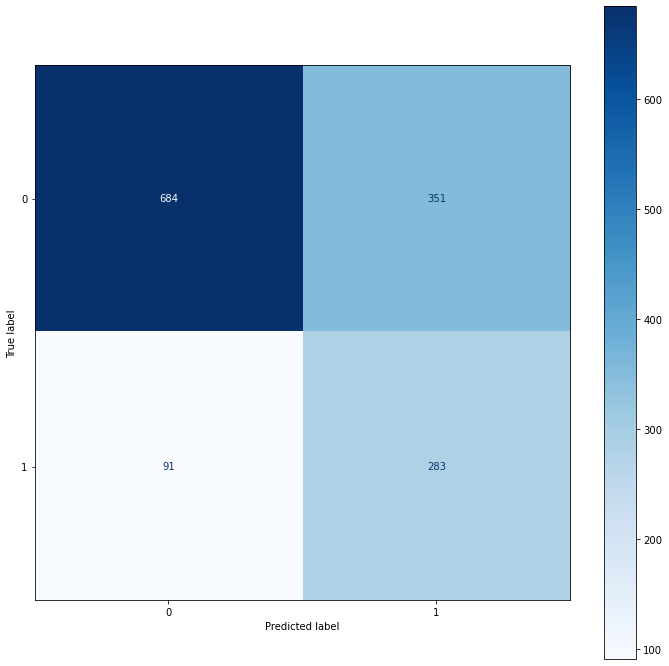

In [72]:
plot_confusion_matrix(final_model_knn, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
param_grid={'criterion':["gini", "entropy"],'max_depth':np.arange(1,20),'splitter':["best", "random"]}
rand=RandomizedSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
rand.fit(X_train_rus,y_train_rus)
print(rand.best_score_)
print(rand.best_params_)

0.7391304347826088
{'splitter': 'best', 'max_depth': 7, 'criterion': 'gini'}


In [75]:
final_model_decision_tree=rand.best_estimator_
final_model_decision_tree.fit(X_train_rus,y_train_rus)
y_pred_decision_tree=final_model_decision_tree.predict(X_test)
print(final_model_decision_tree.score(X_train_rus,y_train_rus))
print(final_model_decision_tree.score(X_test,y_test))

0.7956521739130434
0.7146912704045423


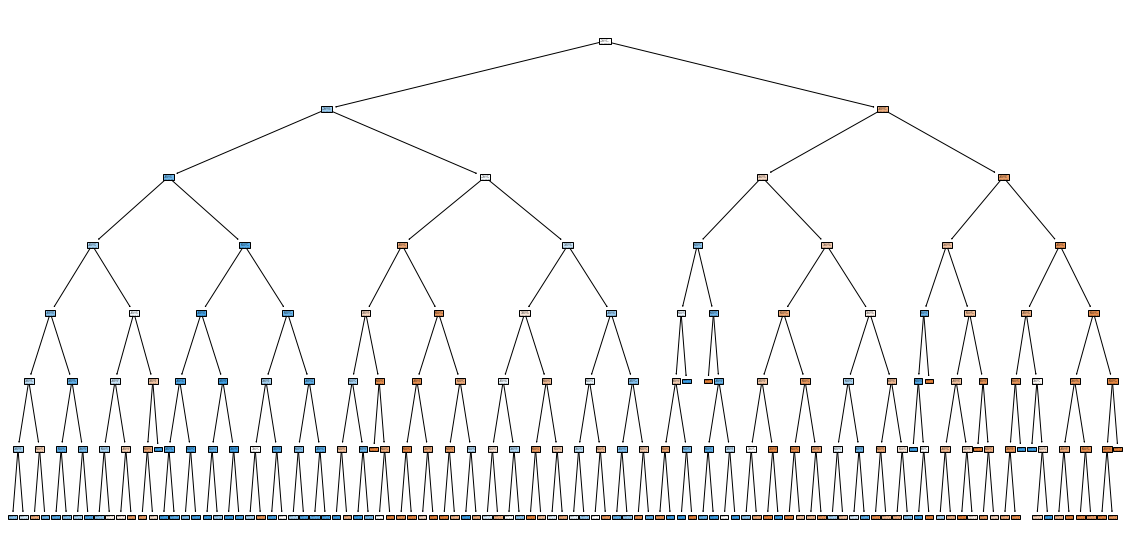

In [76]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(final_model_decision_tree, filled=True)
plt.show()

In [77]:
report=classification_report(y_test,y_pred_decision_tree,output_dict=True)
print(classification_report(y_test,y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1035
           1       0.48      0.78      0.59       374

    accuracy                           0.71      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.71      0.73      1409



In [78]:
recall_decision_tree =  report['weighted avg']['recall'] 
precsion_decision_tree = report['weighted avg']['precision']    
F1_score_decision_tree = report['weighted avg']['f1-score']
print(recall_decision_tree)
print(precsion_decision_tree)
print(F1_score_decision_tree)

0.7146912704045423
0.7841368573825692
0.7305028270315179


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


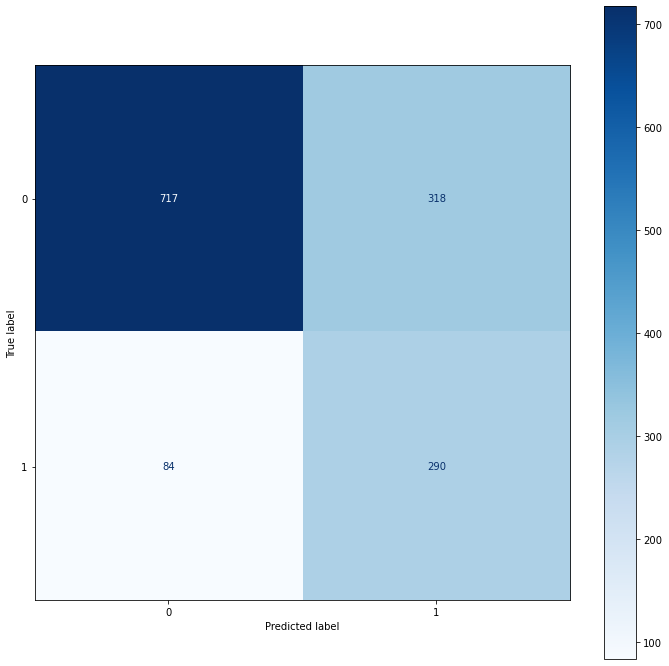

In [79]:
plot_confusion_matrix(final_model_decision_tree, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# LogisticRegression

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [80]:
# Chargement de LogisticRegression
from sklearn.linear_model import LogisticRegression

In [81]:
param_grid ={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'C' : np.linspace(-4, 4, 20),
             'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
             'max_iter' : [100, 1000,2500, 5000]
             }
rand=RandomizedSearchCV(LogisticRegression(),param_grid,cv=5)
rand.fit(X_train_rus,y_train_rus)
print(rand.best_score_)
print(rand.best_params_)

C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


0.7311036789297659
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'C': 0.21052631578947345}


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueE

In [82]:
final_model_logistic_regression=rand.best_estimator_
final_model_logistic_regression.fit(X_train_rus,y_train_rus)
y_pred_logistic_regression=final_model_logistic_regression.predict(X_test)
print(final_model_logistic_regression.score(X_train_rus,y_train_rus))
print(final_model_logistic_regression.score(X_test,y_test))

0.7327759197324415
0.7154009936124911


In [83]:
report=classification_report(y_test,y_pred_logistic_regression,output_dict=True)
print(classification_report(y_test,y_pred_logistic_regression))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1035
           1       0.48      0.73      0.58       374

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.72      0.73      1409



In [84]:
recall_logistic_regression=  report['weighted avg']['recall'] 
precsion_logistic_regression= report['weighted avg']['precision']    
F1_score_logistic_regression= report['weighted avg']['f1-score']
print(recall_logistic_regression)
print(precsion_logistic_regression)
print(F1_score_logistic_regression)

0.7154009936124911
0.7722829067755036
0.7301684149098534


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


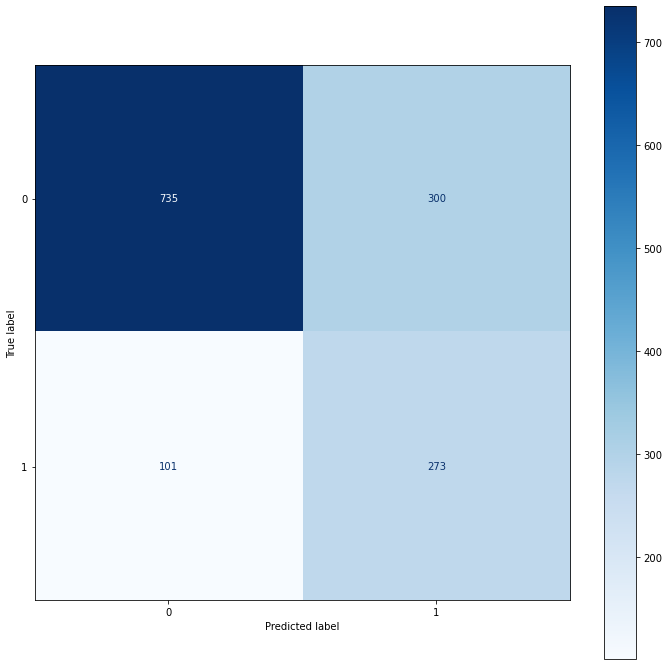

In [85]:
plot_confusion_matrix(final_model_logistic_regression, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# GaussianNB (Gaussian Naive Bayes)

In [86]:
# Chargement de GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score

In [87]:
nb={'gaussian':GaussianNB(),'Bernoulli':BernoulliNB(),'Multinomial': MultinomialNB()}
score={}
for key,model in nb.items():
    S=cross_val_score(model,X_train_rus,y_train_rus,cv=5,scoring='accuracy')
    score[key]=np.mean(S)
print(score)

for model, key in score.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if key == max(score.values()):
        if model=='gaussian':
            final_model_Naive_Bayes=GaussianNB()
        elif model=='Bernoulli':
            final_model_Naive_Bayes=BernoulliNB()
        elif model=='Multinomial':
            final_model_Naive_Bayes=MultinomialNB()

{'gaussian': 0.7244147157190635, 'Bernoulli': 0.7247491638795986, 'Multinomial': 0.7187290969899666}


In [88]:
final_model_Naive_Bayes.fit(X_train_rus,y_train_rus)
y_pred_Naive_Bayes=final_model_Naive_Bayes.predict(X_test)
print(final_model_Naive_Bayes.score(X_train_rus,y_train_rus))
print(final_model_Naive_Bayes.score(X_test,y_test))

0.725752508361204
0.7104329311568488


In [89]:
report=classification_report(y_test,y_pred_Naive_Bayes,output_dict=True)
print(classification_report(y_test,y_pred_Naive_Bayes))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1035
           1       0.47      0.75      0.58       374

    accuracy                           0.71      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.71      0.73      1409



In [90]:
recall_Naive_Bayes=  report['weighted avg']['recall'] 
precsion_Naive_Bayes= report['weighted avg']['precision']    
F1_score_Naive_Bayes= report['weighted avg']['f1-score']
print(recall_Naive_Bayes)
print(precsion_Naive_Bayes)
print(F1_score_Naive_Bayes)

0.7104329311568488
0.7749624295013925
0.7261207784983513


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


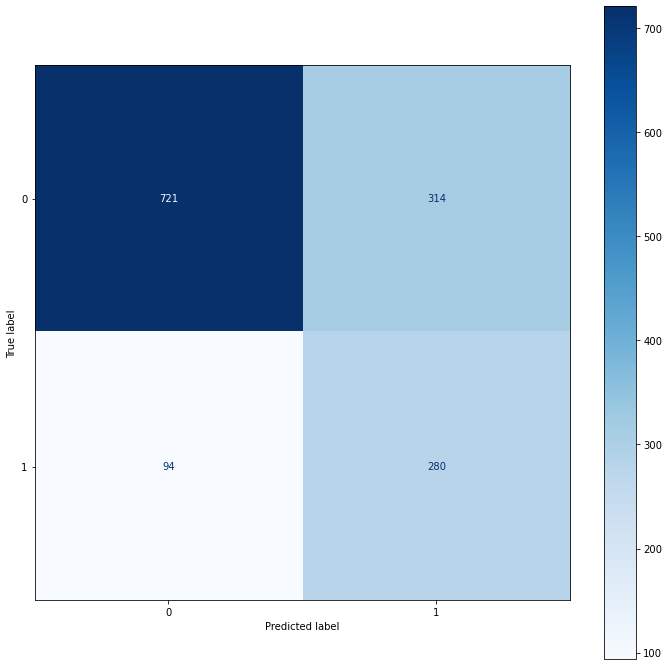

In [91]:
plot_confusion_matrix(final_model_Naive_Bayes, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# SVM

In [92]:
from sklearn.svm import SVC

In [93]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}  
rand = RandomizedSearchCV(SVC(), param_grid, cv=5) 
rand.fit(X_train_rus,y_train_rus)
print(rand.best_score_)
print(rand.best_params_)

0.7434782608695653
{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}


In [94]:
final_model_SVM=rand.best_estimator_
final_model_SVM.fit(X_train_rus,y_train_rus)
y_pred_SVM=final_model_SVM.predict(X_test)
print(final_model_SVM.score(X_train_rus,y_train_rus))
print(final_model_SVM.score(X_test,y_test))

0.762876254180602
0.7267565649396736


In [95]:
report=classification_report(y_test,y_pred_SVM,output_dict=True)
print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1035
           1       0.49      0.74      0.59       374

    accuracy                           0.73      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.73      0.74      1409



In [96]:
recall_SVM=  report['weighted avg']['recall'] 
precsion_SVM= report['weighted avg']['precision']    
F1_score_SVM= report['weighted avg']['f1-score']
print(recall_SVM)
print(precsion_SVM)
print(F1_score_SVM)

0.7267565649396736
0.7802752805070621
0.7406589268248703


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


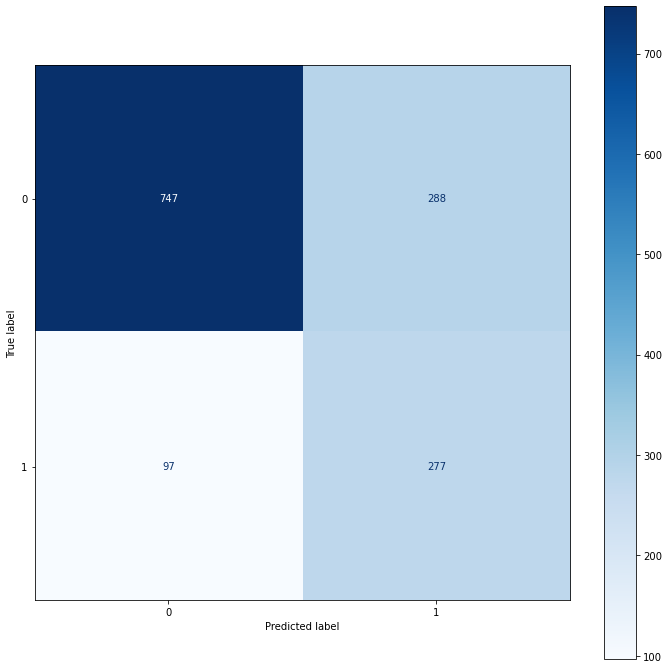

In [97]:
plot_confusion_matrix(final_model_SVM, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
RFC=RandomForestClassifier(n_estimators=70,max_depth=5)
param_grid ={'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
             'criterion' : ['gini', 'entropy', 'log_loss'],
             'max_depth' : [1,2,3,4,5,6,7,8,9,10]
             }
rand=RandomizedSearchCV(RFC,param_grid,cv=5)
rand.fit(X_train_rus,y_train_rus)
print(rand.best_score_)
print(rand.best_params_)

0.7605351170568562
{'n_estimators': 70, 'max_depth': 9, 'criterion': 'entropy'}


In [100]:
final_model_RFC=rand.best_estimator_
final_model_RFC.fit(X_train_rus,y_train_rus)
y_pred_RFC=final_model_RFC.predict(X_test)
print(final_model_RFC.score(X_train_rus,y_train_rus))
print(final_model_RFC.score(X_test,y_test))

0.8528428093645485
0.7246273953158269


In [101]:
report=classification_report(y_test,y_pred_RFC,output_dict=True)
print(classification_report(y_test,y_pred_RFC))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1035
           1       0.49      0.79      0.60       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.72      0.74      1409



In [102]:
recall_RFC=  report['weighted avg']['recall'] 
precsion_RFC= report['weighted avg']['precision']    
F1_score_RFC= report['weighted avg']['f1-score']
print(recall_RFC)
print(precsion_RFC)
print(F1_score_RFC)

0.7246273953158269
0.7921179093984944
0.7397968217752949


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


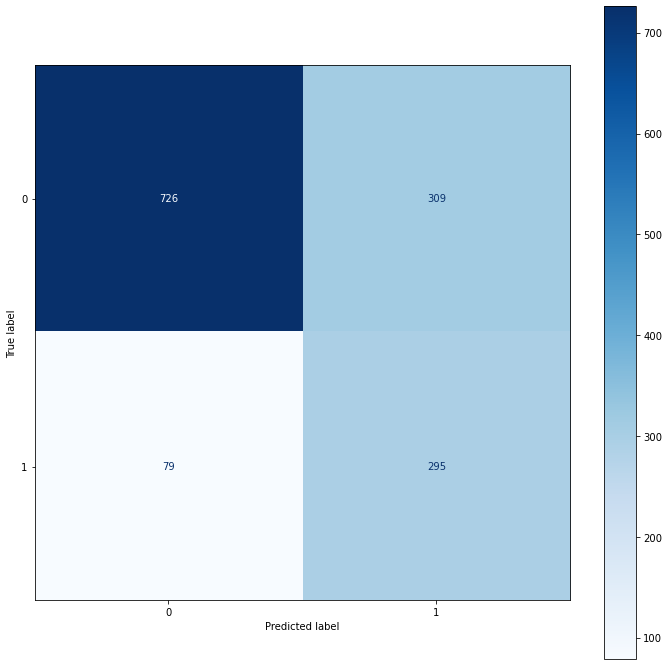

In [103]:
plot_confusion_matrix(final_model_RFC, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# XGBoost

In [104]:
from xgboost import XGBClassifier

In [105]:
param_grid ={'n_estimators' : [10,20,30,40,50],
             'max_depth' : np.arange(2, 8),
             'booster' : ['gbtree', 'gblinear','dart'],
             'learning_rate' : [0.0100, 0.001000,0.000100, 0.00001]
             }
XGBC=XGBClassifier(random_state=42)
rand=RandomizedSearchCV(XGBC,param_grid,cv=5)
rand.fit(X_train_rus,y_train_rus)
print(rand.best_score_)
print(rand.best_params_)

[22:39:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[22:39:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[22:39:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[22:39:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[22:39:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[22:3

In [106]:
final_model_XGBC=rand.best_estimator_
final_model_XGBC.fit(X_train_rus,y_train_rus)
y_pred_XGBC=final_model_XGBC.predict(X_test)
print(final_model_XGBC.score(X_train_rus,y_train_rus))
print(final_model_XGBC.score(X_test,y_test))

0.7936454849498328
0.694819020581973


In [107]:
report=classification_report(y_test,y_pred_XGBC,output_dict=True)
print(classification_report(y_test,y_pred_XGBC))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1035
           1       0.46      0.79      0.58       374

    accuracy                           0.69      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.78      0.69      0.71      1409



In [108]:
recall_XGBC=  report['weighted avg']['recall'] 
precsion_XGBC= report['weighted avg']['precision']    
F1_score_XGBC= report['weighted avg']['f1-score']
print(recall_XGBC)
print(precsion_XGBC)
print(F1_score_XGBC)

0.694819020581973
0.780521934921395
0.71244940420002


C:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


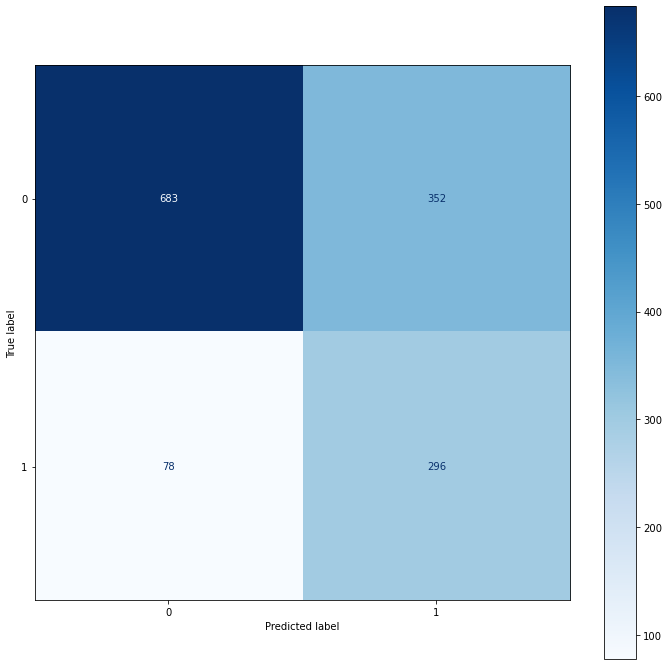

In [109]:
plot_confusion_matrix(final_model_XGBC, X_test, y_test,cmap=plt.cm.Blues)  
plt.show()

# Etude compartive

In [110]:
Algorithm=['KNN',
           'Decision Tree',
           'GaussianNB',
           'LogisticRegression',
           'SVM',
           'Random Forest',
           'XGBOOST']
weighted_avg_recall=[recall_knn,
                     recall_decision_tree,
                     recall_Naive_Bayes,
                     recall_logistic_regression,
                     recall_SVM,
                     recall_RFC,
                     recall_XGBC]
weighted_avg_precsion=[precsion_knn,
                       precsion_decision_tree,
                       precsion_Naive_Bayes,
                       precsion_logistic_regression,
                       precsion_SVM,
                       precsion_RFC,
                       precsion_XGBC]
weighted_avg_F1_score=[F1_score_knn,
                       F1_score_decision_tree,
                       F1_score_Naive_Bayes,
                       F1_score_logistic_regression,
                       F1_score_SVM,
                       F1_score_RFC,
                       F1_score_XGBC]
campare_dataframe=pd.DataFrame([Algorithm, weighted_avg_recall, weighted_avg_precsion,weighted_avg_F1_score],['Algorithm','weighted_avg_recall','weighted_avg_precsion','weighted_avg_F1_score'])
campare_dataframe.T

,Algorithm,weighted_avg_recall,weighted_avg_precsion,weighted_avg_F1_score
0,KNN,0.686302,0.766795,0.704229
1,Decision Tree,0.714691,0.784137,0.730503
2,GaussianNB,0.710433,0.774962,0.726121
3,LogisticRegression,0.715401,0.772283,0.730168
4,SVM,0.726757,0.780275,0.740659
5,Random Forest,0.724627,0.792118,0.739797
6,XGBOOST,0.694819,0.780522,0.712449


# Courbe Roc et Auc

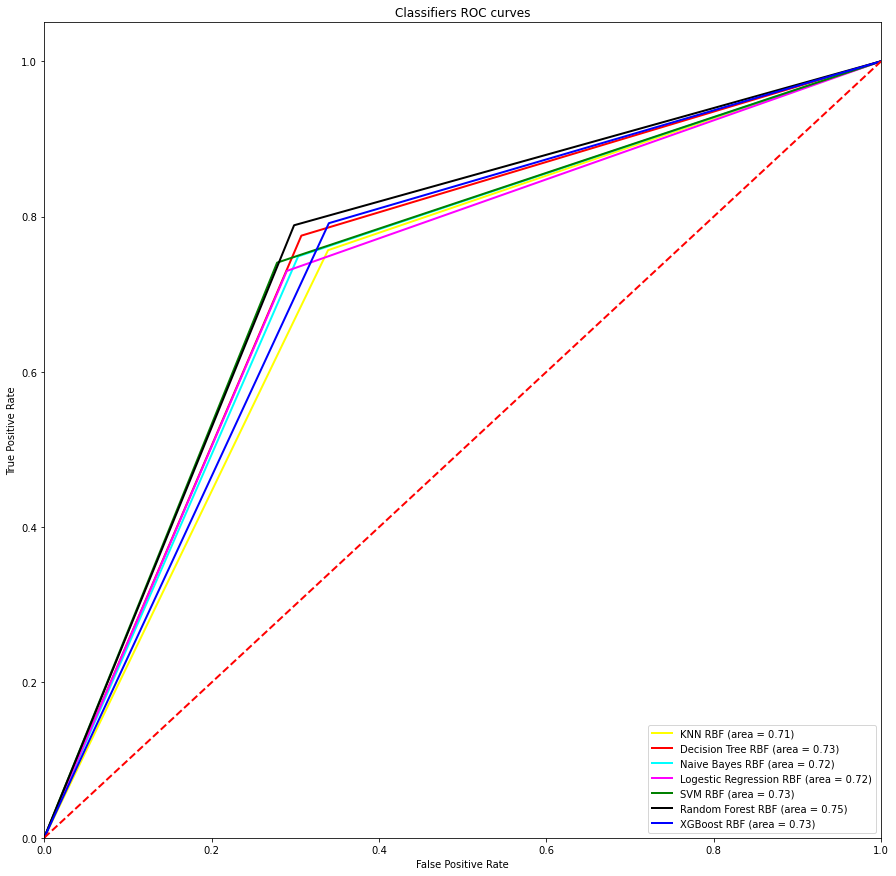

In [113]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_knn) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_decision_tree) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_Naive_Bayes)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_logistic_regression) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_SVM) 
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, threshold6 = roc_curve(y_test, y_pred_RFC) 
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, threshold7 = roc_curve(y_test, y_pred_XGBC) 
roc_auc7 = auc(fpr7, tpr7)

plt.figure(figsize=(15,15)) 

plt.plot(fpr1, tpr1, color='yellow', lw=2, label='KNN RBF (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Decision Tree RBF (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='Naive Bayes RBF (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Logestic Regression RBF (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='green', lw=2, label='SVM RBF (area = %0.2f)'% roc_auc5)
plt.plot(fpr6, tpr6, color='black', lw=2, label='Random Forest RBF (area = %0.2f)'% roc_auc6)
plt.plot(fpr7, tpr7, color='blue', lw=2, label='XGBoost RBF (area = %0.2f)'% roc_auc7)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

# Deployment

In [115]:
#le SVM est le modele qui nous donnes les meilleurs mesures de performances
pickle.dump(final_model_SVM,open('model.pkl','wb'))